In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate
from matplotlib import cm
from root_pandas import read_root
import scipy.stats
from matplotlib import gridspec
import matplotlib.lines as mlines
import ROOT
import scipy.stats
from matplotlib import gridspec
import matplotlib.lines as mlines
from scipy.stats import chi2
from scipy import interpolate
import pandas as pd

plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 

def getArrays(tree):

    chi2_c = np.zeros(tree.GetEntries())
    dm2_c = np.zeros(tree.GetEntries())
    sin22th_c = np.zeros(tree.GetEntries())
    
    for j in range(tree.GetEntries()):
        tree.GetEntry(j)
        
        chi2_c[j] = tree.chi2
        dm2_c[j] = tree.dm2
        sin22th_c[j] = tree.sin22th
        
    chi2 = chi2_c[chi2_c>0]
    dm2 = dm2_c[chi2_c>0]
    sin22th = sin22th_c[chi2_c>0]
    return chi2, dm2, sin22th

def getContour(sin22th,dm2):

    adm2 = np.asarray(dm2)
    asin22th = np.asarray(sin22th)

    cosin22th = np.zeros(len(np.unique(adm2)))
    codm2 = np.zeros(len(np.unique(adm2)))

    for i in range(len(np.unique(adm2))):
        indy = np.argmin(asin22th[adm2==adm2[i]])
        cosin22th[i] = asin22th[adm2==np.unique(adm2)[i]][indy]
        codm2[i] = np.unique(adm2)[i]    
    
    return cosin22th, codm2

def getContourt(tree):

    dm2 = np.zeros(tree.GetEntries())
    sin22th = np.zeros(tree.GetEntries())
    
    for j in range(tree.GetEntries()):
        tree.GetEntry(j)
        
        dm2[j] = tree.dm2
        sin22th[j] = tree.sin22th
    
    adm2 = np.asarray(dm2)
    asin22th = np.asarray(sin22th)


    cosin22th = np.zeros(len(np.unique(adm2)))
    codm2 = np.zeros(len(np.unique(adm2)))

    for i in range(len(np.unique(adm2))):
        indy = np.argmin(asin22th[adm2==adm2[i]])
        cosin22th[i] = asin22th[adm2==np.unique(adm2)[i]][indy]
        codm2[i] = np.unique(adm2)[i]    
    
    return cosin22th, codm2

# Shape+Rate

In [3]:
# we're going to load in two arrays
f_chi = np.genfromtxt('../data/uboone/chilist_shapeonly_apr20.txt')[:,1:]
f_coord = np.genfromtxt('../data/uboone/coordlist_shapeonly_apr20.txt')
f_binedges = np.genfromtxt('../data/uboone/binedges_shapeonly_apr20.txt')

In [4]:
a_dm2 = f_coord[:,2]
a_sin22th = f_coord[:,1]
binedges_dm2 = f_binedges[0,1:]
binedges_sin22th = f_binedges[1,1:]

mindex_90 = int(np.floor((.9)*len(f_chi[0])))
mindex_99 = int(np.floor((.99)*len(f_chi[0])))
mindex_1sig = int(np.floor((.68)*len(f_chi[0])))

chieff_90 = []
chieff_99 = []
chieff_1sig = []
for chil in f_chi:
    el90 = np.partition(chil,mindex_90)[mindex_90]
    el99 = np.partition(chil,mindex_99)[mindex_99]
    el1sig = np.partition(chil,mindex_1sig)[mindex_1sig]

    chieff_90.append(el90)
    chieff_99.append(el99)
    chieff_1sig.append(el1sig)

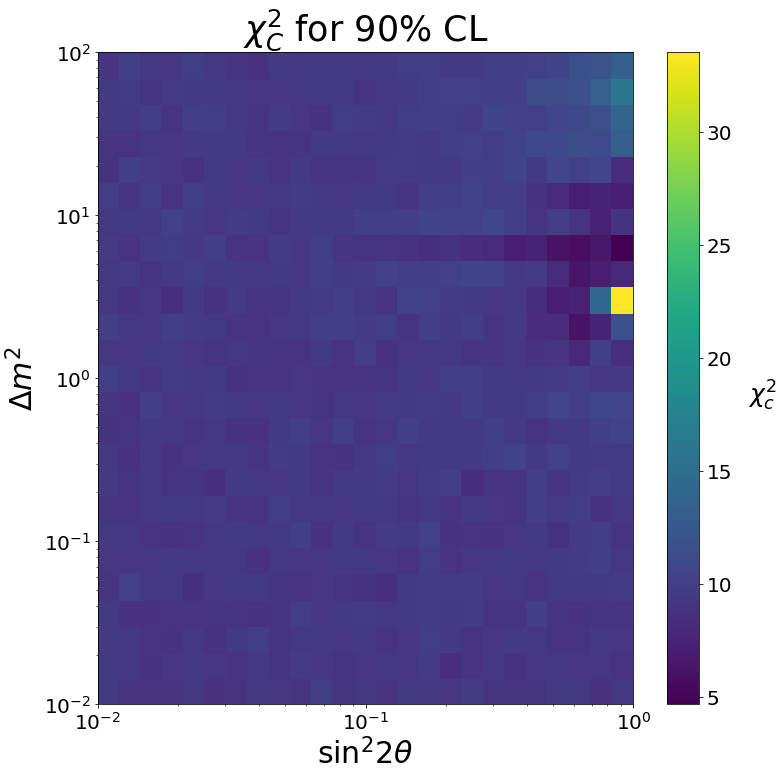

In [4]:
fig,ax = plt.subplots(figsize=(12,12))

chi2data = np.asarray((a_sin22th,a_dm2,chieff_90))
chi2df = pd.DataFrame(data=chi2data.T,columns=['sin22th','dm2','chi2eff_90'])

ax.set_xlabel(r'$\sin^22\theta$',fontsize=30)
ax.set_ylabel(r'$\Delta m^2$',fontsize=30)

ax.set_title(r'$\chi^2_C$ for 90% CL',fontsize=35)

ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')

hist, xbins, ybins, im = plt.hist2d(a_sin22th,a_dm2,bins=(binedges_sin22th,binedges_dm2),weights=chieff_90) #  data
cbar = plt.colorbar()
cbar.set_label(r'$\chi^2_c$', rotation=0,fontsize=25,labelpad=30)


# for i in range(len(xbins)-1):
#     for j in range(len(ybins)-1):
#         ax.text(xbins[i],ybins[j], hist[i,j], color="w", ha="center", va="center", fontweight="bold")

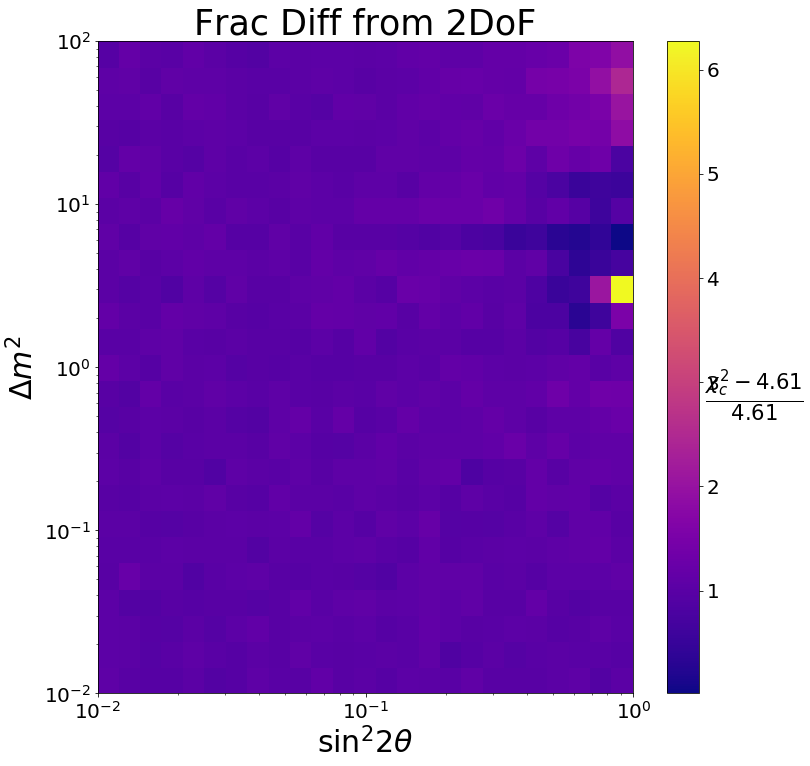

In [5]:
fig,ax = plt.subplots(figsize=(12,12))

ax.set_xlabel(r'$\sin^22\theta$',fontsize=30)
ax.set_ylabel(r'$\Delta m^2$',fontsize=30)

ax.set_title(r'Frac Diff from 2DoF',fontsize=35)

xbins = np.logspace(-3,-.1875,16)
ybins = np.logspace(-2,1.8,26)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')

hist, xbins, ybins, im = plt.hist2d(a_sin22th,a_dm2,bins=(binedges_sin22th,binedges_dm2),weights=(np.asarray(chieff_90)-4.61)/4.61,cmap='plasma') #  data
cbar = plt.colorbar()
cbar.set_label(r'$\frac{\chi^2_c-4.61}{4.61}$', rotation=0,fontsize=30,labelpad=35)




# Make a contour!

In [5]:
f_chi_sr = np.genfromtxt('../data/uboone/chilist_shaperate_apr20.txt')[:,1:]
f_coord_sr = np.genfromtxt('../data/uboone/coordlist_shaperate_apr20.txt')
a_dm2_sr = f_coord_sr[:,2]
a_sin22th_sr = f_coord_sr[:,1]

mindex_90_sr = int(np.floor((.9)*len(f_chi_sr[0])))
chieff_90_sr = []

for chil in f_chi_sr:
    el90 = np.partition(chil,mindex_90_sr)[mindex_90_sr]
    chieff_90_sr.append(el90)

f_chi_so = np.genfromtxt('../data/uboone/chilist_shapeonly_apr20.txt')[:,1:]
f_coord_so = np.genfromtxt('../data/uboone/coordlist_shapeonly_apr20.txt')
a_dm2_so = f_coord_so[:,2]
a_sin22th_so = f_coord_so[:,1]

mindex_90_so = int(np.floor((.9)*len(f_chi_so[0])))
chieff_90_so = []

for chil in f_chi_so:
    el90 = np.partition(chil,mindex_90_so)[mindex_90_so]
    chieff_90_so.append(el90)

In [6]:
#f = ROOT.TFile("/home/dcianci/Physics/GlobalFits/SBN_3plusN/GlobalFits_v2/build/ubSensVeryfine_Apr16_proc_v1.root")
f = ROOT.TFile("../apr28freqtest/ublim_sr_proc_v1.root")
tchi_sr = f.Get("numudis_chiogram")
chi2_sr, dm2_sr, sin22th_sr = getArrays(tchi_sr)

g90_sr = interpolate.griddata((a_sin22th_sr,a_dm2_sr),chieff_90_sr,(sin22th_sr,dm2_sr),method='linear')

ex_90_dm2_freq_sr = []
ex_90_sin22th_freq_sr = []

al_90_dm2_freq_sr = []
al_90_sin22th_freq_sr = []

chi2min_sr = chi2_sr.min() # sr
print(chi2min_sr)

for i,chisq in enumerate(chi2_sr):
    if chisq - chi2min_sr > g90_sr[i]:
        ex_90_dm2_freq_sr.append(dm2_sr[i])
        ex_90_sin22th_freq_sr.append(sin22th_sr[i])
    if chisq - chi2min_sr < g90_sr[i]:
        al_90_dm2_freq_sr.append(dm2_sr[i])
        al_90_sin22th_freq_sr.append(sin22th_sr[i])

13.61976432800293


In [7]:
f = ROOT.TFile("../apr28freqtest/ublim_so_proc_v1.root")
tchi_so = f.Get("numudis_chiogram")
chi2_so, dm2_so, sin22th_so = getArrays(tchi_so)

g90_so = interpolate.griddata((a_sin22th_so,a_dm2_so),chieff_90_so,(sin22th_so,dm2_so),method='linear')
        
ex_90_dm2_freq_so = []
ex_90_sin22th_freq_so = []

al_90_dm2_freq_so = []
al_90_sin22th_freq_so = []

chi2min_so = chi2_so.min() # sr
print(chi2min_so)

for i,chisq in enumerate(chi2_so):
    if chisq - chi2min_so > g90_so[i]:
        ex_90_dm2_freq_so.append(dm2_so[i])
        ex_90_sin22th_freq_so.append(sin22th_so[i])
    if chisq - chi2min_so < g90_so[i]:
        al_90_dm2_freq_so.append(dm2_so[i])
        al_90_sin22th_freq_so.append(sin22th_so[i])

6.879618167877197


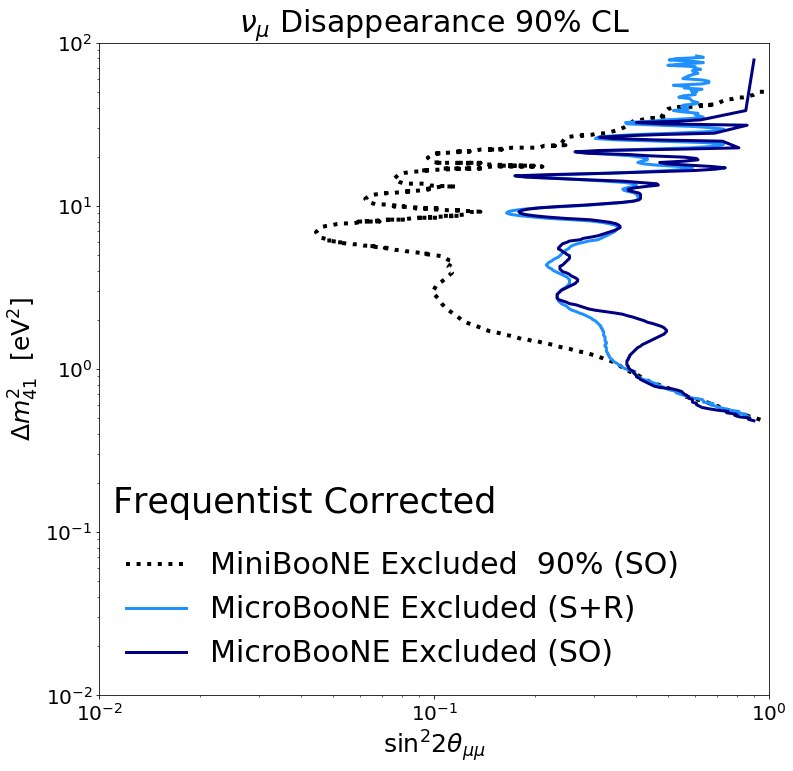

In [8]:
fig, ax = plt.subplots(figsize=(12,12))
msize=15

mbnudis_90cl=np.genfromtxt("limits/mbnudis_90.csv",delimiter=',')
refx = mbnudis_90cl[:,0]
refy = mbnudis_90cl[:,1]
plt.plot(refx[refy.argsort()],refy[refy.argsort()], color='black',  linestyle=":",linewidth=4,zorder=-1)
plt.plot([0],[0],color='black',linestyle=':',linewidth=4,label='MiniBooNE Excluded  90% (SO)')


ln_90_sin22th,lin_90_dm2 = getContour(ex_90_sin22th_freq_sr,ex_90_dm2_freq_sr)
plt.plot(ln_90_sin22th,lin_90_dm2,linewidth=3,label='MicroBooNE Excluded (S+R)',c='dodgerblue')

ln_90_sin22th,lin_90_dm2 = getContour(ex_90_sin22th_freq_so,ex_90_dm2_freq_so)
plt.plot(ln_90_sin22th,lin_90_dm2,linewidth=3,label='MicroBooNE Excluded (SO)',c='navy')


plt.annotate('Frequentist Corrected',xy=(0.02, .28), xycoords='axes fraction',fontsize=35)
ax.set_title(r'$\nu_\mu$ Disappearance 90% CL',fontsize=30)
ax.legend(fontsize=30,frameon=False,loc='lower left')

plt.xlim(1e-2,1)
plt.ylim(0.01,100)
ax.set_ylabel(r'$\Delta m_{41}^2$  [eV$^2$]',fontsize=25)
ax.set_xlabel(r'$\sin^2 2 \theta_{\mu \mu}$',fontsize=25)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')

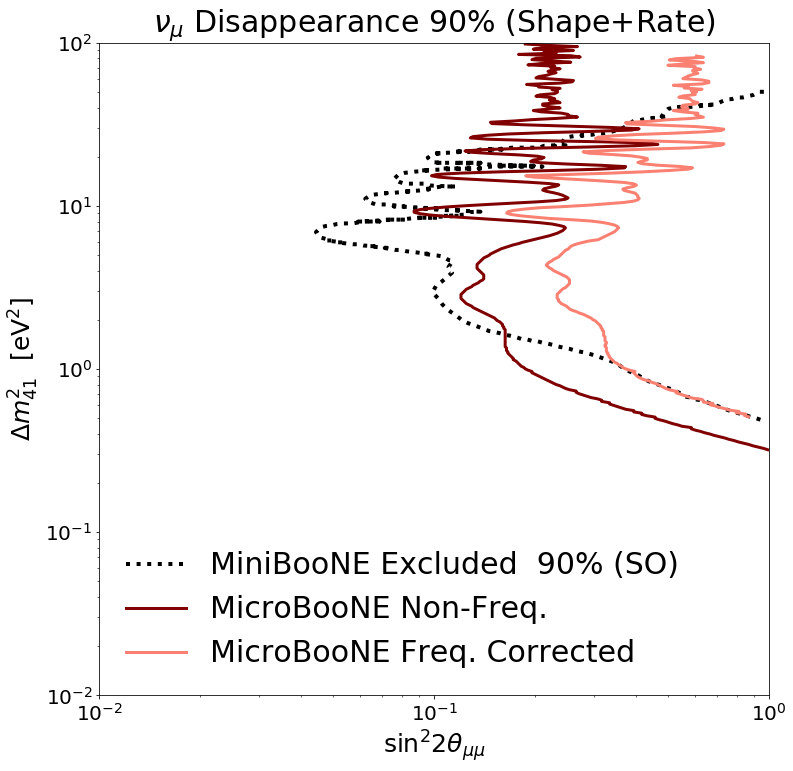

In [10]:
fig, ax = plt.subplots(figsize=(12,12))
msize=15

mbnudis_90cl=np.genfromtxt("limits/mbnudis_90.csv",delimiter=',')
refx = mbnudis_90cl[:,0]
refy = mbnudis_90cl[:,1]
plt.plot(refx[refy.argsort()],refy[refy.argsort()], color='black',  linestyle=":",linewidth=4,zorder=-1)
plt.plot([0],[0],color='black',linestyle=':',linewidth=4,label='MiniBooNE Excluded  90% (SO)')

f = ROOT.TFile("../apr28freqtest/ublim_sr_proc_v1.root")
tchi_95 = f.Get("numudis_90_exclusion")
sin22th_95,dm2_95 = getContourt(tchi_95)        
plt.plot(sin22th_95,dm2_95,c='maroon',linewidth=3,label=r'MicroBooNE Non-Freq.')

ln_90_sin22th,lin_90_dm2 = getContour(ex_90_sin22th_freq_sr,ex_90_dm2_freq_sr)
plt.plot(ln_90_sin22th,lin_90_dm2,linewidth=3,label='MicroBooNE Freq. Corrected',c='salmon')


ax.set_title(r'$\nu_\mu$ Disappearance 90% (Shape+Rate)',fontsize=30)
ax.legend(fontsize=30,frameon=False,loc='lower left')

plt.xlim(1e-2,1)
plt.ylim(0.01,100)
ax.set_ylabel(r'$\Delta m_{41}^2$  [eV$^2$]',fontsize=25)
ax.set_xlabel(r'$\sin^2 2 \theta_{\mu \mu}$',fontsize=25)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')

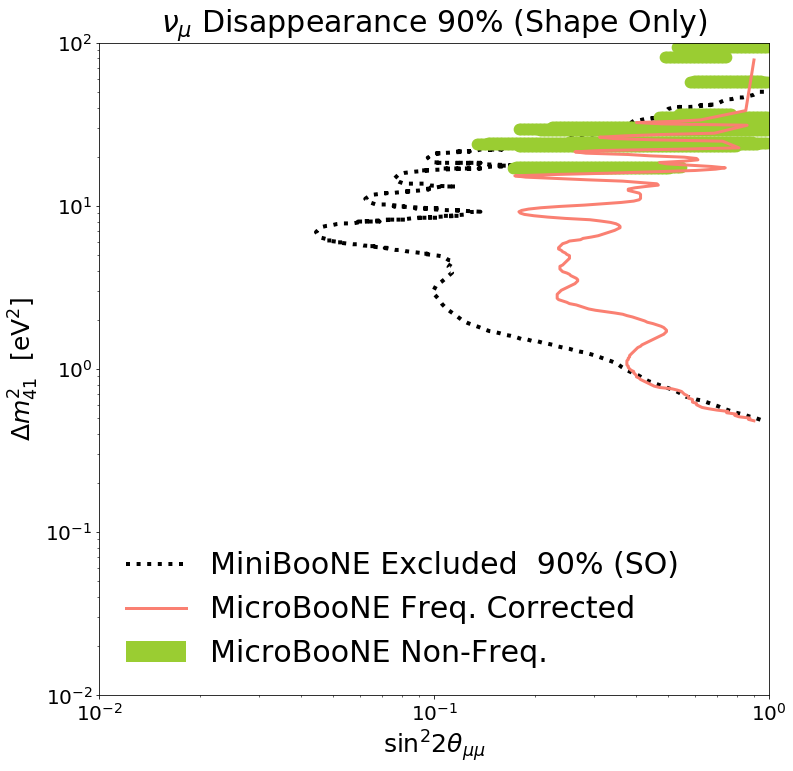

In [11]:
fig, ax = plt.subplots(figsize=(12,12))
msize=15

mbnudis_90cl=np.genfromtxt("limits/mbnudis_90.csv",delimiter=',')
refx = mbnudis_90cl[:,0]
refy = mbnudis_90cl[:,1]
plt.plot(refx[refy.argsort()],refy[refy.argsort()], color='black',  linestyle=":",linewidth=4,zorder=-1)
plt.plot([0],[0],color='black',linestyle=':',linewidth=4,label='MiniBooNE Excluded  90% (SO)')

f = ROOT.TFile("../apr28freqtest/ublim_so_proc_v1.root")
tchi_95 = f.Get("numudis_90")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.scatter(sin22th_95,dm2_95,s=75,c='yellowgreen',linewidth=3)
plt.hist([0],range=(0,0.0001),color='yellowgreen',label=r'MicroBooNE Non-Freq.')


ln_90_sin22th,lin_90_dm2 = getContour(ex_90_sin22th_freq_so,ex_90_dm2_freq_so)
plt.plot(ln_90_sin22th,lin_90_dm2,linewidth=3,label='MicroBooNE Freq. Corrected',c='salmon')


ax.set_title(r'$\nu_\mu$ Disappearance 90% (Shape Only)',fontsize=30)
ax.legend(fontsize=30,frameon=False,loc='lower left')

plt.xlim(1e-2,1)
plt.ylim(0.01,100)
ax.set_ylabel(r'$\Delta m_{41}^2$  [eV$^2$]',fontsize=25)
ax.set_xlabel(r'$\sin^2 2 \theta_{\mu \mu}$',fontsize=25)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')

In [12]:
# Load up references
gallium=np.genfromtxt("limits/gallium_95.csv", delimiter=',')
karmen=np.genfromtxt("limits/karmen_95.csv", delimiter=',')
nomad=np.genfromtxt("limits/nomad_95.csv", delimiter=',')
numi=np.genfromtxt("limits/numi_95.csv", delimiter=',')

xsec=np.genfromtxt("limits/xsec_95.csv", delimiter=',')
bugey=np.genfromtxt("limits/bugey_90.csv",delimiter=',')

danss=np.genfromtxt("limits/danss_95.csv", delimiter=',')
cdhs=np.genfromtxt("limits/cdhs_95.csv", delimiter=',')
ccfr=np.genfromtxt("limits/ccfr_95.csv", delimiter=',')
lsnd1=np.genfromtxt("limits/LSND_1.csv", delimiter=',')
lsnd2=np.genfromtxt("limits/LSND_2.csv", delimiter=',')
lsnd3=np.genfromtxt("limits/LSND_3.csv", delimiter=',')
neos=np.genfromtxt("limits/neos_90.csv", delimiter=',')
mb_combined_99cl=np.genfromtxt("limits/mb_combined_99.csv", delimiter=',')
mb_combined_90cl=np.genfromtxt("limits/mb_combined_90.csv", delimiter=',')
ic = np.genfromtxt('/home/dcianci/Physics/GlobalFits/IcecubePack/notebooks/ic90.txt')

minos_90 = np.genfromtxt('limits/minosminosplus_90.csv',delimiter=',')

mb_combined_2018_99cl1=np.genfromtxt("limits/mb_ref2018_99_1.csv", delimiter=',')
mb_combined_2018_99cl2=np.genfromtxt("limits/mb_ref2018_99_2.csv", delimiter=',')
mb_combined_2018_99cl3=np.genfromtxt("limits/mb_ref2018_99_3.csv", delimiter=',')
mb_combined_2018_99cl4=np.genfromtxt("limits/mb_ref2018_99_4.csv", delimiter=',')

mb_combined_2018_90cl=np.genfromtxt("limits/mb_ref2018_90.csv", delimiter=',')

mbnudis_90cl=np.genfromtxt("limits/mbnudis_90.csv",delimiter=',')
mbnubardis_90cl=np.genfromtxt("limits/mbnubardis_90.csv",delimiter=',')


#lsnd_davio_99cl1=np.genfromtxt("limits/lsnd_davio_99_1.csv",delimeter=',')
#lsnd_davio_99cl1=np.genfromtxt("limits/lsnd_davio_99_1.csv",delimeter=',')

Text(0.5, 1.0, '$\\nu_\\mu$ Disappearance Limits')

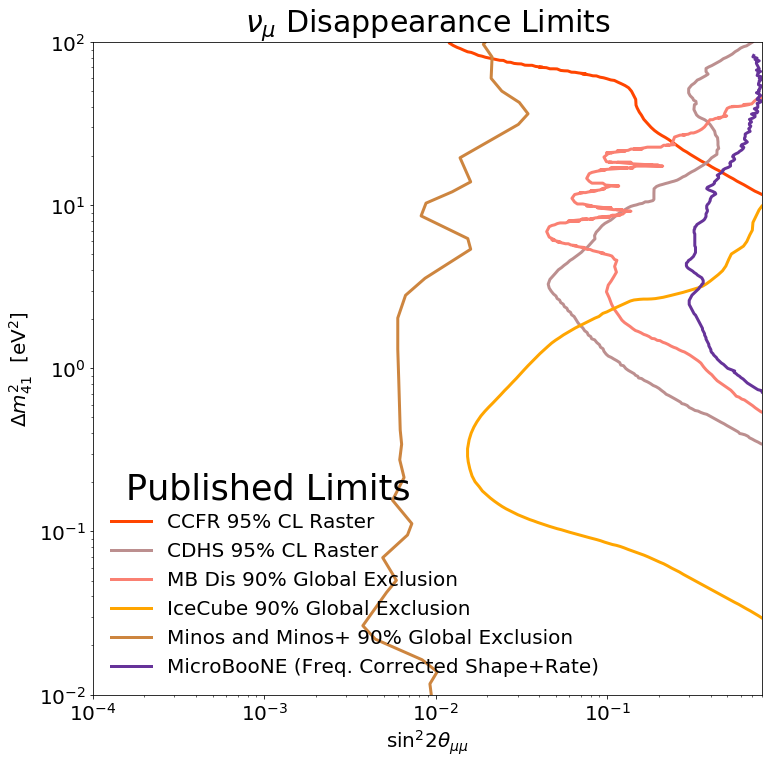

In [19]:
fig, ax = plt.subplots(figsize=(12,12))

bkalpha = 1.0

refx = ccfr[:,0]
refy = ccfr[:,1]
plt.plot(refx[refy.argsort()],refy[refy.argsort()],label='CCFR 95% CL Raster',c='orangered',linewidth=3,alpha=bkalpha)

refx = cdhs[:,0]
refy = cdhs[:,1]
plt.plot(refx[refy.argsort()],refy[refy.argsort()],label='CDHS 95% CL Raster',c='rosybrown',linewidth=3,alpha=bkalpha)

refx = mbnudis_90cl[:,0]
refy = mbnudis_90cl[:,1]
plt.plot(refx[refy.argsort()],refy[refy.argsort()],label='MB Dis 90% Global Exclusion',alpha=bkalpha,c='salmon',linewidth=3)

plt.plot(ic[:,0],ic[:,1],label="IceCube 90% Global Exclusion",alpha=bkalpha,c='orange',linewidth=3)

plt.plot(minos_90[:,0],minos_90[:,1],label="Minos and Minos+ 90% Global Exclusion",alpha=bkalpha,c='peru',linewidth=3)

ln_90_sin22th,lin_90_dm2 = getContour(ex_90_sin22th_freq_sr,ex_90_dm2_freq_sr)
plt.plot(ln_90_sin22th,lin_90_dm2,linewidth=3,label='MicroBooNE (Freq. Corrected Shape+Rate)',c='rebeccapurple')

plt.annotate('Published Limits',xy=(0.05, .3), xycoords='axes fraction',fontsize=35)


ax.legend(fontsize=20,frameon=False)

plt.xlim(1e-4,.8)
plt.ylim(0.01,100)
ax.set_ylabel(r'$\Delta m_{41}^2$  [eV$^2$]',fontsize=20)
ax.set_xlabel(r'$\sin^2 2 \theta_{\mu \mu}$',fontsize=20)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')

ax.set_title(r'$\nu_\mu$ Disappearance Limits',fontsize=30)

In [9]:
#f = ROOT.TFile("/home/dcianci/Physics/GlobalFits/SBN_3plusN/GlobalFits_v2/build/ubSensVeryfine_Apr16_proc_v1.root")
f = ROOT.TFile("../apr28freqtest/ubsens_sr_proc_v1.root")
tchi_sr = f.Get("numudis_chiogram")
chi2_sr, dm2_sr, sin22th_sr = getArrays(tchi_sr)

g90_sr = interpolate.griddata((a_sin22th_sr,a_dm2_sr),chieff_90_sr,(sin22th_sr,dm2_sr),method='linear')

ex_90_dm2_freq_sr = []
ex_90_sin22th_freq_sr = []

al_90_dm2_freq_sr = []
al_90_sin22th_freq_sr = []

chi2min_sr = chi2_sr.min() # sr
print(chi2min_sr)

for i,chisq in enumerate(chi2_sr):
    if chisq - chi2min_sr > g90_sr[i]:
        ex_90_dm2_freq_sr.append(dm2_sr[i])
        ex_90_sin22th_freq_sr.append(sin22th_sr[i])
    if chisq - chi2min_sr < g90_sr[i]:
        al_90_dm2_freq_sr.append(dm2_sr[i])
        al_90_sin22th_freq_sr.append(sin22th_sr[i])

6.020096227077332e-11


In [10]:
f = ROOT.TFile("../apr28freqtest/ubsens_so_proc_v1.root")
tchi_so = f.Get("numudis_chiogram")
chi2_so, dm2_so, sin22th_so = getArrays(tchi_so)

g90_so = interpolate.griddata((a_sin22th_so,a_dm2_so),chieff_90_so,(sin22th_so,dm2_so),method='linear')
        
ex_90_dm2_freq_so = []
ex_90_sin22th_freq_so = []

al_90_dm2_freq_so = []
al_90_sin22th_freq_so = []

chi2min_so = chi2_so.min() # sr
print(chi2min_so)

for i,chisq in enumerate(chi2_so):
    if chisq - chi2min_so > g90_so[i]:
        ex_90_dm2_freq_so.append(dm2_so[i])
        ex_90_sin22th_freq_so.append(sin22th_so[i])
    if chisq - chi2min_so < g90_so[i]:
        al_90_dm2_freq_so.append(dm2_so[i])
        al_90_sin22th_freq_so.append(sin22th_so[i])

2.186624319111541e-11


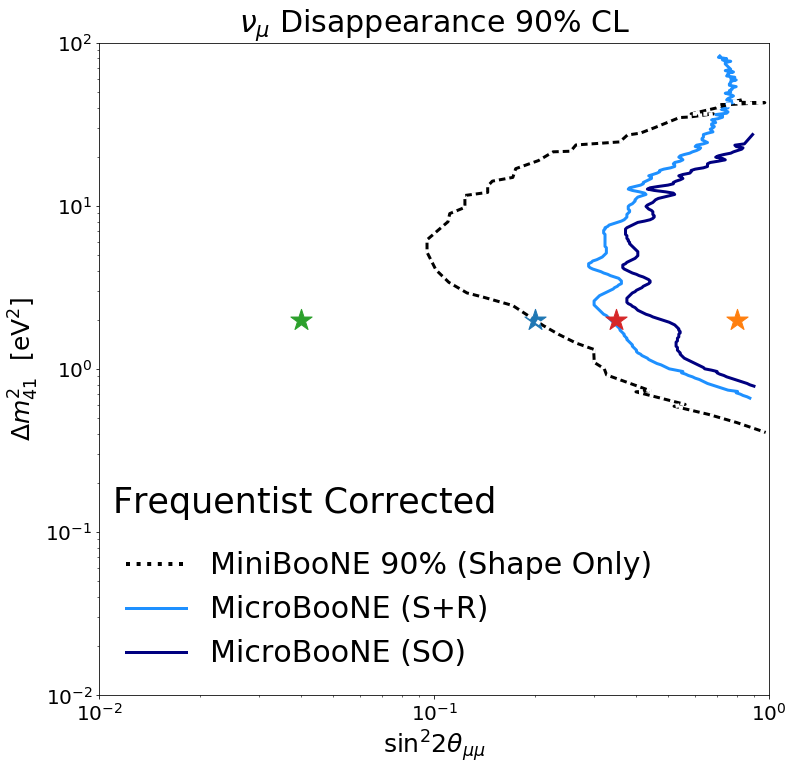

In [11]:
fig, ax = plt.subplots(figsize=(12,12))
msize=15


mbnudis_90cl=np.genfromtxt("limits/ubsens_90.csv",delimiter=',')
refx = mbnudis_90cl[:,0]
refy = mbnudis_90cl[:,1]
plt.plot(refx[refy.argsort()],refy[refy.argsort()], color='black',  linestyle="-",linewidth=3,zorder=-1)
plt.plot(refx[refy.argsort()],refy[refy.argsort()], color='white',  linestyle=":",linewidth=4,zorder=10)

plt.plot([0],[0],color='black',linestyle=':',linewidth=4,label='MiniBooNE 90% (Shape Only)')


ln_90_sin22th,lin_90_dm2 = getContour(ex_90_sin22th_freq_sr,ex_90_dm2_freq_sr)
plt.plot(ln_90_sin22th,lin_90_dm2,linewidth=3,label='MicroBooNE (S+R)',c='dodgerblue')

ln_90_sin22th,lin_90_dm2 = getContour(ex_90_sin22th_freq_so,ex_90_dm2_freq_so)
plt.plot(ln_90_sin22th,lin_90_dm2,linewidth=3,label='MicroBooNE (SO)',c='navy')

plt.scatter([.2],[2],marker='*',s=500,zorder=10)
plt.scatter([.8],[2],marker='*',s=500,zorder=10)
plt.scatter([.04],[2],marker='*',s=500,zorder=10)

plt.scatter([.35],[2],marker='*',s=500,zorder=10)

# plt.scatter([.7],[0.6],marker='*',s=500,zorder=10)



plt.annotate('Frequentist Corrected',xy=(0.02, .28), xycoords='axes fraction',fontsize=35)
ax.set_title(r'$\nu_\mu$ Disappearance 90% CL',fontsize=30)
ax.legend(fontsize=30,frameon=False,loc='lower left')

plt.xlim(1e-2,1)
plt.ylim(0.01,100)
ax.set_ylabel(r'$\Delta m_{41}^2$  [eV$^2$]',fontsize=25)
ax.set_xlabel(r'$\sin^2 2 \theta_{\mu \mu}$',fontsize=25)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')

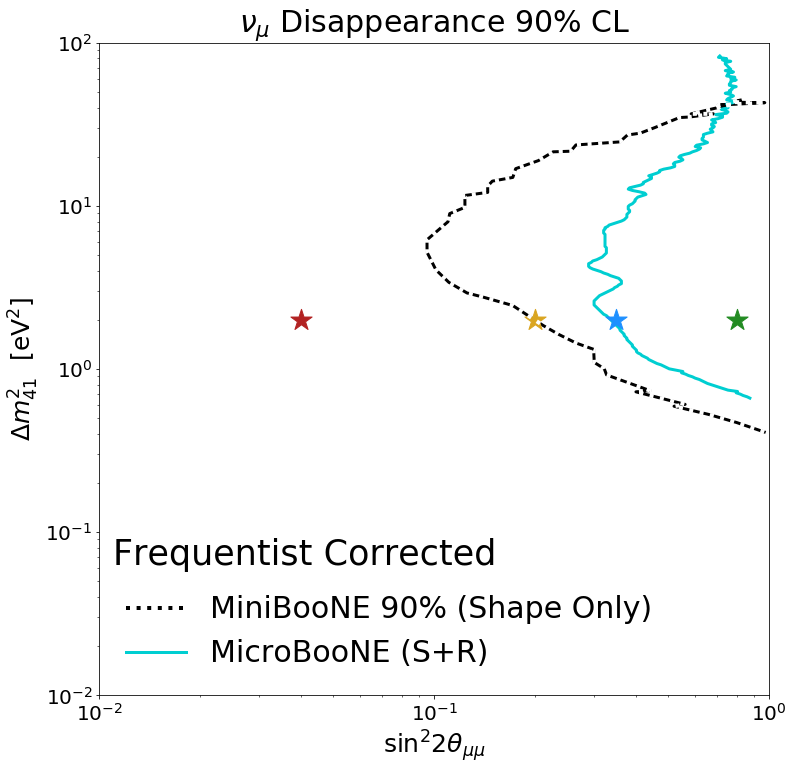

In [17]:
fig, ax = plt.subplots(figsize=(12,12))
msize=15


mbnudis_90cl=np.genfromtxt("limits/ubsens_90.csv",delimiter=',')
refx = mbnudis_90cl[:,0]
refy = mbnudis_90cl[:,1]
plt.plot(refx[refy.argsort()],refy[refy.argsort()], color='black',  linestyle="-",linewidth=3,zorder=-1)
plt.plot(refx[refy.argsort()],refy[refy.argsort()], color='white',  linestyle=":",linewidth=4,zorder=10)

plt.plot([0],[0],color='black',linestyle=':',linewidth=4,label='MiniBooNE 90% (Shape Only)')


ln_90_sin22th,lin_90_dm2 = getContour(ex_90_sin22th_freq_sr,ex_90_dm2_freq_sr)
plt.plot(ln_90_sin22th,lin_90_dm2,linewidth=3,label='MicroBooNE (S+R)',c='darkturquoise')

plt.scatter([.04],[2],marker='*',s=500,zorder=10,c='firebrick')
plt.scatter([.2],[2],marker='*',s=500,zorder=10,c='goldenrod')
plt.scatter([.35],[2],marker='*',s=500,zorder=10,c='dodgerblue')
plt.scatter([.8],[2],marker='*',s=500,zorder=10,c='forestgreen')




plt.annotate('Frequentist Corrected',xy=(0.02, .2), xycoords='axes fraction',fontsize=35)
ax.set_title(r'$\nu_\mu$ Disappearance 90% CL',fontsize=30)
ax.legend(fontsize=30,frameon=False,loc='lower left')

plt.xlim(1e-2,1)
plt.ylim(0.01,100)
ax.set_ylabel(r'$\Delta m_{41}^2$  [eV$^2$]',fontsize=25)
ax.set_xlabel(r'$\sin^2 2 \theta_{\mu \mu}$',fontsize=25)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')

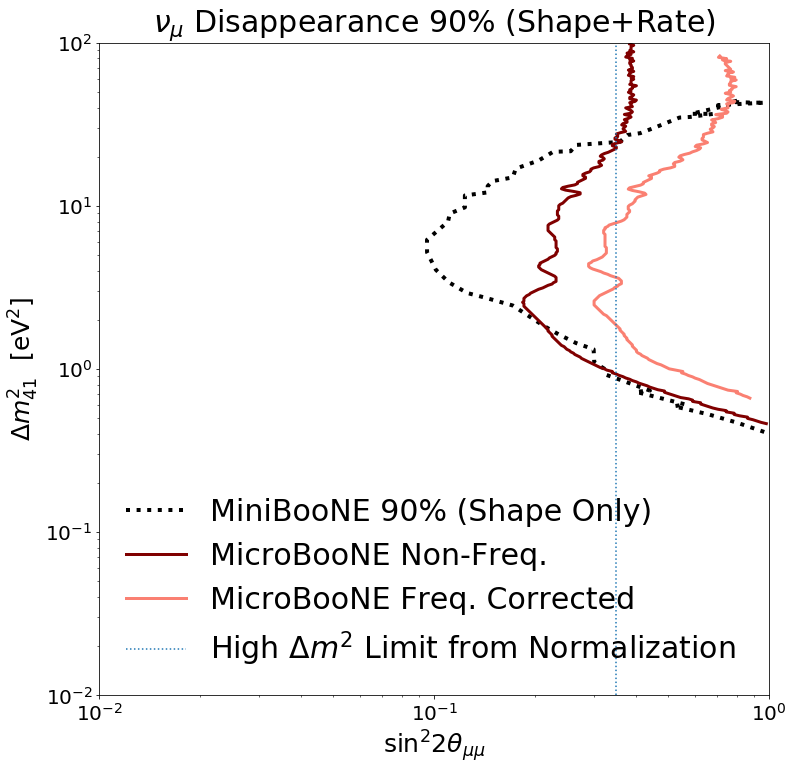

In [46]:
fig, ax = plt.subplots(figsize=(12,12))
msize=15


mbnudis_90cl=np.genfromtxt("limits/ubsens_90.csv",delimiter=',')
refx = mbnudis_90cl[:,0]
refy = mbnudis_90cl[:,1]
plt.plot(refx[refy.argsort()],refy[refy.argsort()], color='black',  linestyle=":",linewidth=4,zorder=-1)

plt.plot([0],[0],color='black',linestyle=':',linewidth=4,label='MiniBooNE 90% (Shape Only)')


f = ROOT.TFile("../apr28freqtest/ubsens_sr_proc_v1.root")
tchi_95 = f.Get("numudis_90_exclusion")
sin22th_95,dm2_95 = getContourt(tchi_95)        
plt.plot(sin22th_95,dm2_95,c='maroon',linewidth=3,label=r'MicroBooNE Non-Freq.')

ln_90_sin22th,lin_90_dm2 = getContour(ex_90_sin22th_freq_sr,ex_90_dm2_freq_sr)
plt.plot(ln_90_sin22th,lin_90_dm2,linewidth=3,label='MicroBooNE Freq. Corrected',c='salmon')

ax.set_title(r'$\nu_\mu$ Disappearance 90% (Shape+Rate)',fontsize=30)

ax.axvline(0.35,linestyle=":",label=r'High $\Delta m^2$ Limit from Normalization')

ax.legend(fontsize=30,frameon=False,loc='lower left')

plt.xlim(1e-2,1)
plt.ylim(0.01,100)
ax.set_ylabel(r'$\Delta m_{41}^2$  [eV$^2$]',fontsize=25)
ax.set_xlabel(r'$\sin^2 2 \theta_{\mu \mu}$',fontsize=25)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')

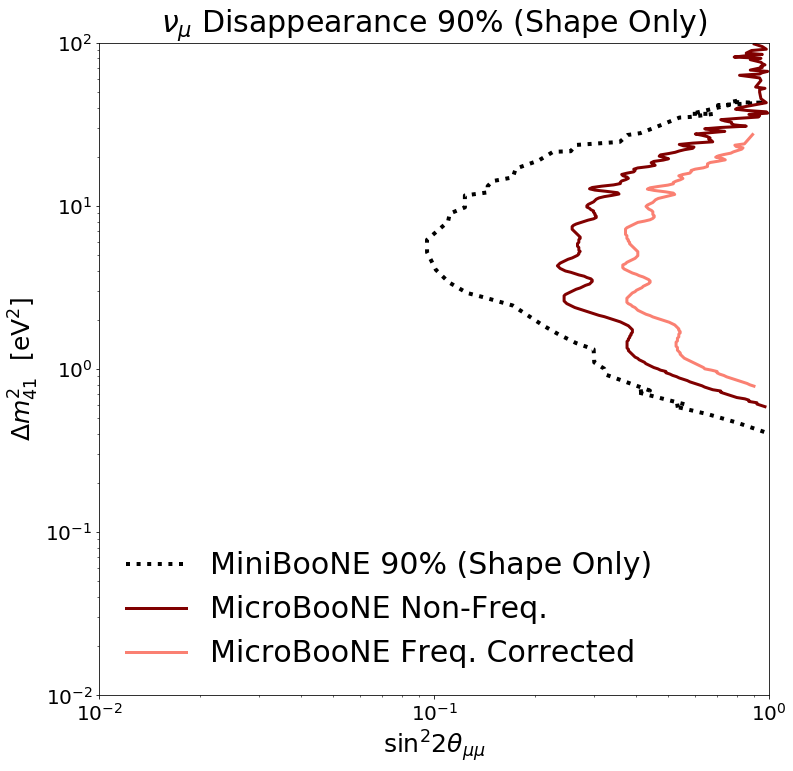

In [53]:
fig, ax = plt.subplots(figsize=(12,12))
msize=15


mbnudis_90cl=np.genfromtxt("limits/ubsens_90.csv",delimiter=',')
refx = mbnudis_90cl[:,0]
refy = mbnudis_90cl[:,1]
plt.plot(refx[refy.argsort()],refy[refy.argsort()], color='black',  linestyle=":",linewidth=4,zorder=-1)

plt.plot([0],[0],color='black',linestyle=':',linewidth=4,label='MiniBooNE 90% (Shape Only)')


f = ROOT.TFile("../apr28freqtest/ubsens_so_proc_v1.root")
tchi_95 = f.Get("numudis_90_exclusion")
sin22th_95,dm2_95 = getContourt(tchi_95)        
plt.plot(sin22th_95,dm2_95,c='maroon',linewidth=3,label=r'MicroBooNE Non-Freq.')

ln_90_sin22th,lin_90_dm2 = getContour(ex_90_sin22th_freq_so,ex_90_dm2_freq_so)
plt.plot(ln_90_sin22th,lin_90_dm2,linewidth=3,label='MicroBooNE Freq. Corrected',c='salmon')

ax.set_title(r'$\nu_\mu$ Disappearance 90% (Shape Only)',fontsize=30)
ax.legend(fontsize=30,frameon=False,loc='lower left')

plt.xlim(1e-2,1)
plt.ylim(0.01,100)
ax.set_ylabel(r'$\Delta m_{41}^2$  [eV$^2$]',fontsize=25)
ax.set_xlabel(r'$\sin^2 2 \theta_{\mu \mu}$',fontsize=25)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
msize=15

mbnudis_90cl=np.genfromtxt("limits/mbnudis_90.csv",delimiter=',')
refx = mbnudis_90cl[:,0]
refy = mbnudis_90cl[:,1]
plt.plot(refx[refy.argsort()],refy[refy.argsort()], color='black',  linestyle="-",linewidth=3,zorder=-1)
plt.plot(refx[refy.argsort()],refy[refy.argsort()], color='white',  linestyle=":",linewidth=4,zorder=10)

plt.scatter(al_90_sin22th_freq,al_90_dm2_freq,s=msize,color='tomato')

plt.hist([0],range=(0,0.0001),color='tomato',label=r'MicroBooNE 90% Allowed')
plt.plot([0],[0],color='black',linestyle=':',linewidth=4,label='MiniBooNE 90%')


ax.set_title(r'$\nu_\mu$ Disappearance Allowed (Shape Only)',fontsize=30)
ax.legend(fontsize=30,frameon=True,loc='lower left')
plt.annotate('With Frequentist Correction',xy=(0.1, .4), xycoords='axes fraction',fontsize=35)

plt.xlim(1e-2,1)
plt.ylim(0.01,100)
ax.set_ylabel(r'$\Delta m_{41}^2$  [eV$^2$]',fontsize=25)
ax.set_xlabel(r'$\sin^2 2 \theta_{\mu \mu}$',fontsize=25)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')

In [40]:
#f = ROOT.TFile("/home/dcianci/Physics/GlobalFits/SBN_3plusN/GlobalFits_v2/build/ubSensVeryfine_Apr16_proc_v1.root")
f = ROOT.TFile("../apr28freqtest/ubsens_so_proc_v1.root")
tchi_c = f.Get("numudis_chiogram")
chi2_c, dm2_c, sin22th_c = getArrays(tchi_c)


bfi = np.argmin(chi2_c)
print(chi2_c[bfi],'at',dm2_c[bfi],sin22th_c[bfi])

ex_90_dm2_freq = []
ex_90_sin22th_freq = []

ex_99_dm2_freq = []
ex_99_sin22th_freq = []

ex_1sig_dm2_freq = []
ex_1sig_sin22th_freq = []

al_90_dm2_freq = []
al_90_sin22th_freq = []

al_99_dm2_freq = []
al_99_sin22th_freq = []

al_1sig_dm2_freq = []
al_1sig_sin22th_freq = []


chi2min = chi2_c.min() # sr
print(chi2min)

for i,chisq in enumerate(chi2_c):
    if chisq - chi2min > g1sig[i]:
        ex_1sig_dm2_freq.append(dm2_c[i])
        ex_1sig_sin22th_freq.append(sin22th_c[i])
    if chisq - chi2min > g90[i]:
        ex_90_dm2_freq.append(dm2_c[i])
        ex_90_sin22th_freq.append(sin22th_c[i])
    if chisq - chi2min > g99[i]:
        ex_99_dm2_freq.append(dm2_c[i])
        ex_99_sin22th_freq.append(sin22th_c[i])
    if chisq - chi2min < g1sig[i]:
        al_1sig_dm2_freq.append(dm2_c[i])
        al_1sig_sin22th_freq.append(sin22th_c[i])
    if chisq - chi2min < g90[i]:
        al_90_dm2_freq.append(dm2_c[i])
        al_90_sin22th_freq.append(sin22th_c[i])
    if chisq - chi2min < g99[i]:
        al_99_dm2_freq.append(dm2_c[i])
        al_99_sin22th_freq.append(sin22th_c[i])

2.186624319111541e-11 at 0.010000000298023224 0.01
2.186624319111541e-11


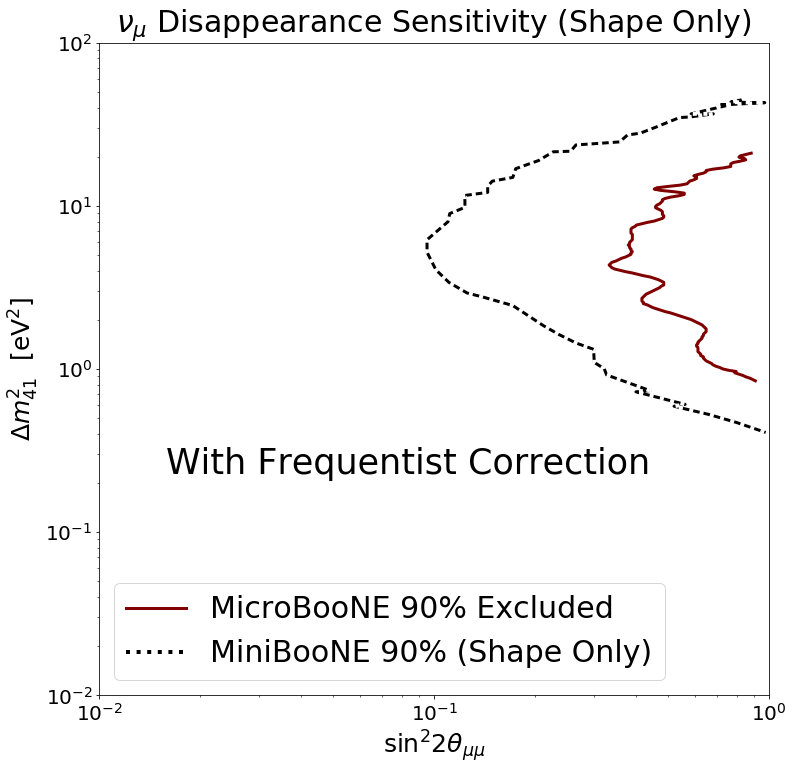

In [41]:
fig, ax = plt.subplots(figsize=(12,12))
msize=15

mbnudis_90cl=np.genfromtxt("limits/ubsens_90.csv",delimiter=',')
refx = mbnudis_90cl[:,0]
refy = mbnudis_90cl[:,1]
plt.plot(refx[refy.argsort()],refy[refy.argsort()], color='black',  linestyle="-",linewidth=3,zorder=-1)
plt.plot(refx[refy.argsort()],refy[refy.argsort()], color='white',  linestyle=":",linewidth=4,zorder=10)

ln_90_sin22th,lin_90_dm2 = getContour(ex_90_sin22th_freq,ex_90_dm2_freq)
plt.plot(ln_90_sin22th,lin_90_dm2,linewidth=3,label=r'MicroBooNE 90% Excluded',c='maroon')
plt.plot([0],[0],color='black',linestyle=':',linewidth=4,label='MiniBooNE 90% (Shape Only)')

#plt.scatter([0.698232], [24.2103],marker='*',s=550,label='Data Best Fit',color='blue',zorder=10)

ax.set_title(r'$\nu_\mu$ Disappearance Sensitivity (Shape Only)',fontsize=30)
ax.legend(fontsize=30,frameon=True,loc='lower left')
plt.annotate('With Frequentist Correction',xy=(0.1, .34), xycoords='axes fraction',fontsize=35)

plt.xlim(1e-2,1)
plt.ylim(0.01,100)
ax.set_ylabel(r'$\Delta m_{41}^2$  [eV$^2$]',fontsize=25)
ax.set_xlabel(r'$\sin^2 2 \theta_{\mu \mu}$',fontsize=25)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')

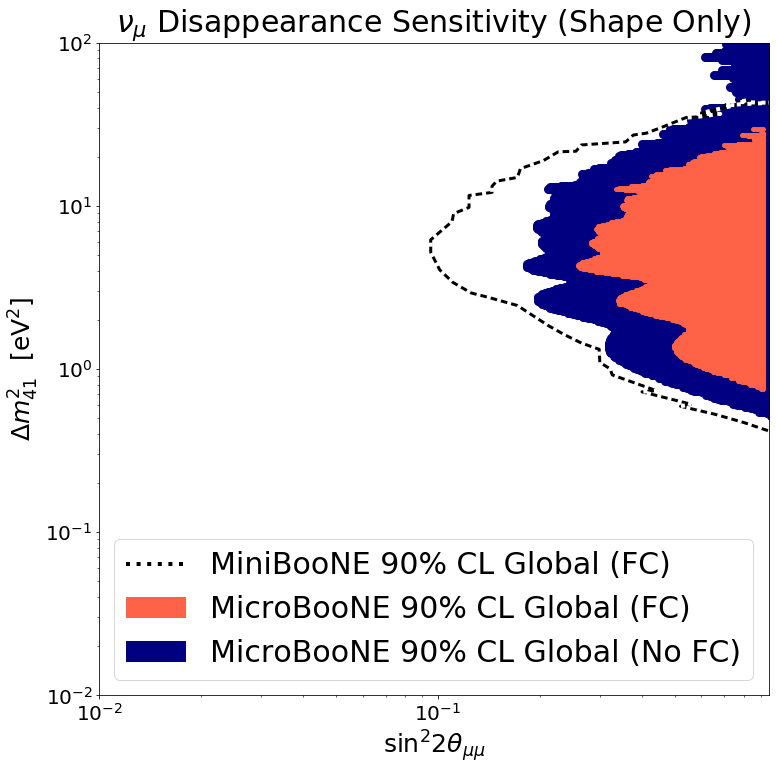

In [108]:
fig, ax = plt.subplots(figsize=(12,12))
msize=15

mbnudis_90cl=np.genfromtxt("limits/ubsens_90.csv",delimiter=',')
refx = mbnudis_90cl[:,0]
refy = mbnudis_90cl[:,1]
plt.plot(refx[refy.argsort()],refy[refy.argsort()], color='black',  linestyle="-",linewidth=3,zorder=-1)
plt.plot(refx[refy.argsort()],refy[refy.argsort()], color='white',  linestyle=":",linewidth=4,zorder=10)

plt.scatter(ex_90_sin22th_freq,ex_90_dm2_freq,s=msize,c='tomato')

plt.hist([0],range=(0,0.0001),color='tomato',label=r'MicroBooNE 90% CL Global (FC)')
plt.hist([0],range=(0,0.0001),color='navy',label=r'MicroBooNE 90% CL Global (No FC)')
plt.plot([0],[0],color='black',linestyle=':',linewidth=4,label='MiniBooNE 90% CL Global (FC)')

#plt.scatter([0.698232], [24.2103],marker='*',s=550,label='Data Best Fit',color='blue',zorder=10)

f = ROOT.TFile("../apr22/ubsens_so_proc_v1.root")
tchi_95 = f.Get("numudis_90_exclusion")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.scatter(sin22th_95,dm2_95,c='navy',linewidth=3,zorder=-2)


ax.set_title(r'$\nu_\mu$ Disappearance Sensitivity (Shape Only)',fontsize=30)
ax.legend(fontsize=30,frameon=True,loc='lower left')

plt.xlim(1e-2,.95)
plt.ylim(0.01,100)
ax.set_ylabel(r'$\Delta m_{41}^2$  [eV$^2$]',fontsize=25)
ax.set_xlabel(r'$\sin^2 2 \theta_{\mu \mu}$',fontsize=25)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')

Messier shit below

In [ ]:
mb_fracsys = np.genfromtxt('../data/miniboone_dis/miniboone_frac_shape_matrix_numu_disap.txt')

In [ ]:
fig,ax = plt.subplots(figsize=(16,10))

ax.set_title('MiniBooNE Fractional Systematic Cov Matrix',fontsize=20)
plt.imshow(mb_fracsys[1:,1:],vmin=-.1, vmax=.2)#,extent=[250,1200,250,1200])
ax.set_ylabel('Reco Neutrino Energy Bins',fontsize=20)
ax.set_xlabel('Reco Neutrino Energy Bins',fontsize=20)

plt.colorbar()

In [ ]:
ub_fracsys = np.genfromtxt('../data/uboone/microboone_fracsysmatrix_feb16.txt')

In [ ]:
fig,ax = plt.subplots(figsize=(16,10))

ax.set_title('MicroBooNE Fractional Systematic Cov Matrix',fontsize=22)
plt.imshow(ub_fracsys[1:,1:],vmin=-.1, vmax=.2,extent=[250,1200,250,1200])
ax.set_ylabel('Reco Neutrino Energy (MeV)',fontsize=20)
ax.set_xlabel('Reco Neutrino Energy (MeV)',fontsize=20)


plt.colorbar()

AttributeError: 'TObject' object has no attribute 'GetEntries'

Error in <TFile::TFile>: file ../Oct2020/validation/ccfr_val_feb4_proc_v1.root does not exist


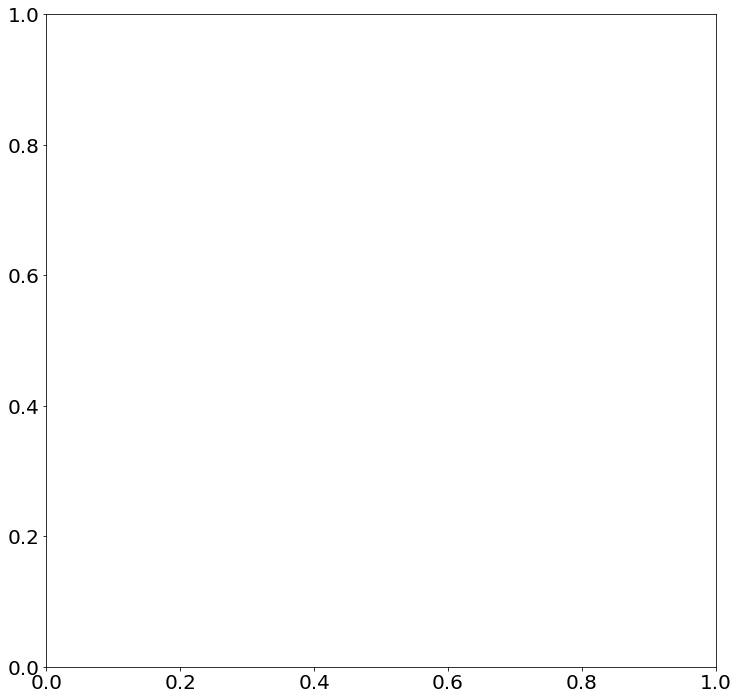

In [108]:
fig, ax = plt.subplots(figsize=(12,12))

bkalpha = 1.0

f = ROOT.TFile("../Oct2020/validation/ccfr_val_feb4_proc_v1.root")
tchi_95 = f.Get("numudis_95_raster")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.plot(sin22th_95,dm2_95,label='CCFR 95% CL Raster',c='orangered',linewidth=3,alpha=bkalpha)

f = ROOT.TFile("../Oct2020/validation/cdhs_val_feb4_proc_v1.root")
tchi_95 = f.Get("numudis_95_raster")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.plot(sin22th_95,dm2_95,label='CDHS 95% CL Raster',c='rosybrown',linewidth=3,alpha=bkalpha)

f = ROOT.TFile("../Oct2020/validation/mbnudis_val_feb4_proc_v1.root")
tchi_95 = f.Get("numudis_95_raster")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.plot(sin22th_95,dm2_95,label=r'MiniBooNE $\nu_\mu$ Dis 95% CL Raster',alpha=bkalpha,c='salmon',linewidth=3)

f = ROOT.TFile("../Oct2020/validation/mbnubardis_val_feb4_proc_v1.root")
tchi_95 = f.Get("numudis_95_raster")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.plot(sin22th_95,dm2_95,label=r'MiniBooNE $\bar{\nu_\mu}$ Dis 95% CL Raster',alpha=bkalpha,c='firebrick',linewidth=3)

f = ROOT.TFile("../Oct2020/validation/ic_val_feb4_proc_v1.root")
tchi_95 = f.Get("numudis_95_raster")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.plot(sin22th_95,dm2_95,label=r'Icecube 95% CL Raster',alpha=bkalpha,c='orange',linewidth=3)


f = ROOT.TFile("../build/ubLimVeryfine_Apr16_proc_v1.root")
tchi_95 = f.Get("numudis_95_raster")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.plot(sin22th_95,dm2_95,c='purple',linewidth=3,label=r'$\mu$B 95% CL Raster')


ax.legend(fontsize=20,frameon=False)

plt.xlim(1e-4,.8)
plt.ylim(0.01,100)
ax.set_ylabel(r'$\Delta m_{41}^2$  [eV$^2$]',fontsize=20)
ax.set_xlabel(r'$\sin^2 2 \theta_{\mu \mu}$',fontsize=20)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')

ax.set_title(r'$\nu_\mu$ Disappearance Limits',fontsize=30)

In [106]:
# Load up references
gallium=np.genfromtxt("limits/gallium_95.csv", delimiter=',')
karmen=np.genfromtxt("limits/karmen_95.csv", delimiter=',')
nomad=np.genfromtxt("limits/nomad_95.csv", delimiter=',')
numi=np.genfromtxt("limits/numi_95.csv", delimiter=',')

xsec=np.genfromtxt("limits/xsec_95.csv", delimiter=',')
bugey=np.genfromtxt("limits/bugey_90.csv",delimiter=',')

danss=np.genfromtxt("limits/danss_95.csv", delimiter=',')
cdhs=np.genfromtxt("limits/cdhs_95.csv", delimiter=',')
ccfr=np.genfromtxt("limits/ccfr_95.csv", delimiter=',')
lsnd1=np.genfromtxt("limits/LSND_1.csv", delimiter=',')
lsnd2=np.genfromtxt("limits/LSND_2.csv", delimiter=',')
lsnd3=np.genfromtxt("limits/LSND_3.csv", delimiter=',')
neos=np.genfromtxt("limits/neos_90.csv", delimiter=',')
mb_combined_99cl=np.genfromtxt("limits/mb_combined_99.csv", delimiter=',')
mb_combined_90cl=np.genfromtxt("limits/mb_combined_90.csv", delimiter=',')
ic = np.genfromtxt('/home/dcianci/Physics/GlobalFits/IcecubePack/notebooks/ic90.txt')



mb_combined_2018_99cl1=np.genfromtxt("limits/mb_ref2018_99_1.csv", delimiter=',')
mb_combined_2018_99cl2=np.genfromtxt("limits/mb_ref2018_99_2.csv", delimiter=',')
mb_combined_2018_99cl3=np.genfromtxt("limits/mb_ref2018_99_3.csv", delimiter=',')
mb_combined_2018_99cl4=np.genfromtxt("limits/mb_ref2018_99_4.csv", delimiter=',')

mb_combined_2018_90cl=np.genfromtxt("limits/mb_ref2018_90.csv", delimiter=',')

mbnudis_90cl=np.genfromtxt("limits/mbnudis_90.csv",delimiter=',')
mbnubardis_90cl=np.genfromtxt("limits/mbnubardis_90.csv",delimiter=',')


#lsnd_davio_99cl1=np.genfromtxt("limits/lsnd_davio_99_1.csv",delimeter=',')
#lsnd_davio_99cl1=np.genfromtxt("limits/lsnd_davio_99_1.csv",delimeter=',')

AttributeError: 'TObject' object has no attribute 'GetEntries'

Error in <TFile::TFile>: file ../build/ubLimVeryfine_Apr16_proc_v1.root does not exist


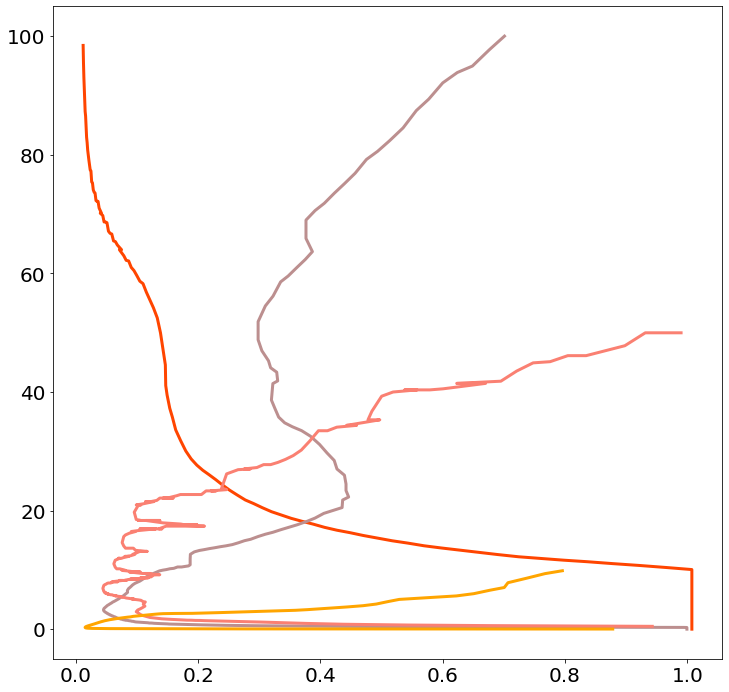

In [107]:
fig, ax = plt.subplots(figsize=(12,12))

bkalpha = 1.0

refx = ccfr[:,0]
refy = ccfr[:,1]
plt.plot(refx[refy.argsort()],refy[refy.argsort()],label='CCFR 95% CL Raster',c='orangered',linewidth=3,alpha=bkalpha)

refx = cdhs[:,0]
refy = cdhs[:,1]
plt.plot(refx[refy.argsort()],refy[refy.argsort()],label='CDHS 95% CL Raster',c='rosybrown',linewidth=3,alpha=bkalpha)

refx = mbnudis_90cl[:,0]
refy = mbnudis_90cl[:,1]
plt.plot(refx[refy.argsort()],refy[refy.argsort()],label='MB Dis 90% Global Exclusion',alpha=bkalpha,c='salmon',linewidth=3)

plt.plot(ic[:,0],ic[:,1],label="IceCube 90% Global Exclusion",alpha=bkalpha,c='orange',linewidth=3)

f = ROOT.TFile("../build/ubLimVeryfine_Apr16_proc_v1.root")
tchi_95 = f.Get("numudis_90_raster")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.plot(sin22th_95,dm2_95,c='purple',linewidth=3,label=r'$\mu$B 90% CL Raster')


plt.annotate('Published Limits',xy=(0.05, .3), xycoords='axes fraction',fontsize=35)


ax.legend(fontsize=20,frameon=False)

plt.xlim(1e-4,.8)
plt.ylim(0.01,100)
ax.set_ylabel(r'$\Delta m_{41}^2$  [eV$^2$]',fontsize=20)
ax.set_xlabel(r'$\sin^2 2 \theta_{\mu \mu}$',fontsize=20)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')

ax.set_title(r'$\nu_\mu$ Disappearance Limits',fontsize=30)

In [ ]:
mb_fracsys = np.genfromtxt('/home/dcianci/Downloads/miniboone_full_fractcovmatrix_nu_lowe.txt')
len(mb_fracsys)
#mb_fracerr = mb_fracsys.diagonal()[:1]

In [ ]:
fig, ax = plt.subplots(figsize=(12,10))
ax.set_xlabel('Energy (MeV)',fontsize=25)
ax.set_ylabel('Events/MeV',fontsize=25)
ax.set_title('MiniBooNE Low Energy Excess',fontsize=30)
plt.xlim(200,1500)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

bins = np.array([200. , 300.,  375.,  475.,  550.,  675.,  800.,  950.,  1100.,  1300.,  1500.,  3000.])

singleevt = bins[:len(bins)-1]
data = [497,283,313,167,184,163,140,115,97,98,130] 
noosc = np.asarray((361.002, 216.002, 239.437, 127.518, 179.035, 133.902, 139.02, 113.447, 81.2045, 98.6039, 137.953))


#normalize by bin width
noosc_normed = noosc/np.diff(bins)    
data_normed = data/np.diff(bins)

bf_normed = bestfit/np.diff(bins)
globfit_normed = globfit/np.diff(bins)
err_normed = err/np.diff(bins)

width = np.diff(bins)
center = (bins[:-1] + bins[1:])/2

plt.hist(singleevt,bins=bins, weights=noosc_normed, histtype='step', stacked=True, fill=True,linewidth=3,color='lightcoral',label=r'MiniBooNE Prediction')
plt.hist(singleevt,bins=bins, weights=noosc_normed, histtype='step', stacked=True, fill=False,linewidth=3,color='firebrick')

ax.errorbar(center,data_normed,fmt='o',c='midnightblue',markersize=10,capsize=10, elinewidth=3, markeredgewidth=3,yerr=err_normed,zorder=10,label='Data')

#plt.annotate(r'MiniBooNE $\nu_e$ Channel',xy=(.45, .3), xycoords='axes fraction',fontsize=18)
#plt.annotate(r'Oscillations Across $\bar{\nu_e},\nu_\mu,\bar{\nu_\mu}$ Not Shown' ,xy=(.45, .26), xycoords='axes fraction',fontsize=18)
#plt.annotate(r'37 Total Degrees of Freedom',xy=(.45, .22), xycoords='axes fraction',fontsize=18)
ax.legend(loc='upper right',fontsize=20,frameon=False)

In [ ]:
ev = np.random.normal(.45 ,.5,nmc)
ev = ev[ev>0]

s = np.random.normal(ev,ev*.5)

plt.hist(ev,range=(0,2),bins=20,alpha=.5)
plt.hist(s,range=(0,2),bins=20,alpha=.5)

In [ ]:
nmc=10000
resol=10
amp=0.6
dm=100


tru = np.random.normal(.45 ,.5,nmc)
tru = tru[tru>0]

reco = np.random.normal(tru,tru*resol)
vals_noosc,binedges,_ = plt.hist(reco,range=(0,2),bins=20,weights=np.ones(len(reco)))
bincenters = binedges[:-1]+np.diff(binedges)/2

disweight = 1-amp*np.power(np.sin(1.27*reco*dm),2)
vals_mc,_,_ = plt.hist(reco,range=(0,2),bins=20,weights=disweight)

vals_mc_scaled = vals_mc*vals_noosc.sum()/vals_mc.sum()

plt.scatter(bincenters,vals_mc_scaled,c='black',zorder=10)

chisq=0
for i in range(len(vals_noosc)):
    if(vals_mc_scaled[i]>0):
        chisq+= pow(vals_noosc[i]-vals_mc_scaled[i],2)/vals_mc_scaled[i]
print(chisq)

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))

f = ROOT.TFile("../apr16/ubSensVeryfine_SO_Apr16_proc_v1.root")
tchi_95 = f.Get("numudis_90_raster")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.plot(sin22th_95,dm2_95,c='dodgerblue',linewidth=3,label='UB 90% CL Raster Scan S+R')

ax.set_title(r'$\nu_\mu$ Disappearance Sensitivity',fontsize=30)
ax.legend(fontsize=30,frameon=False)

plt.xlim(1e-2,1)
plt.ylim(0.01,100)
ax.set_ylabel(r'$\Delta m_{41}^2$  [eV$^2$]',fontsize=25)
ax.set_xlabel(r'$\sin^2 2 \theta_{\mu \mu}$',fontsize=25)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')


ax.axvline(0.3)
ax.axvline(0.9)
ax.axhline(80)
ax.axhline(.1)

In [ ]:
ndraws = 100
eldraw = np.random.rand(ndraws)*2*np.pi

fig,ax = plt.subplots(figsize=(12,12))

_ = plt.hist(np.power(np.sin(eldraw),2),range=(0,1),bins=20)
mean = np.power(np.sin(eldraw),2).mean()
ax.axvline(mean)
print(mean)

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))

f = ROOT.TFile("../apr19/ubSens_thetas_proc_v1.root")
tchi_95 = f.Get("numudis_90_raster")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.plot(sin22th_95,dm2_95,c='rebeccapurple',linewidth=3,label=r'UB 90% CL Raster Thetas')

f = ROOT.TFile("../apr19/ubSens_lepton_costheta_proc_v1.root")
tchi_95 = f.Get("numudis_90_raster")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.plot(sin22th_95,dm2_95,c='red',linewidth=3,label=r'UB 90% CL Raster Cos$\Theta_\mu$')

f = ROOT.TFile("../apr19/ubSens_muon_edep_proc_v1.root")
tchi_95 = f.Get("numudis_90_raster")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.plot(sin22th_95,dm2_95,c='green',linewidth=3,label=r'UB 90% CL Raster $T_\mu$')

f = ROOT.TFile("../apr19/ubSens_enu_1m1p_proc_v1.root")
tchi_95 = f.Get("numudis_90_raster")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.plot(sin22th_95,dm2_95,c='teal',linewidth=3,label=r'UB 90% CL Raster $E_\nu$')


ax.set_title(r'$\nu_\mu$ Disappearance Sensitivity',fontsize=30)
ax.legend(fontsize=30,frameon=False)

plt.xlim(1e-2,1)
plt.ylim(0.01,100)
ax.set_ylabel(r'$\Delta m_{41}^2$  [eV$^2$]',fontsize=25)
ax.set_xlabel(r'$\sin^2 2 \theta_{\mu \mu}$',fontsize=25)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))

f = ROOT.TFile("../apr19/ubsens_thetas_statsonly_proc_v1.root")
tchi_95 = f.Get("numudis_90_raster")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.plot(sin22th_95,dm2_95,c='rebeccapurple',linewidth=3,label=r'UB 90% CL Raster Thetas')

f = ROOT.TFile("../apr19/ubsens_enu_1m1p_statsonly_proc_v1.root")
tchi_95 = f.Get("numudis_90_raster")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.plot(sin22th_95,dm2_95,c='teal',linewidth=3,label=r'UB 90% CL Raster $E_\nu$')


ax.set_title(r'$\nu_\mu$ Disappearance Sensitivity (Stats Only)',fontsize=30)
ax.legend(fontsize=30,frameon=False)

plt.xlim(1e-2,1)
plt.ylim(0.01,100)
ax.set_ylabel(r'$\Delta m_{41}^2$  [eV$^2$]',fontsize=25)
ax.set_xlabel(r'$\sin^2 2 \theta_{\mu \mu}$',fontsize=25)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')

# Chi2 Distributions

In [84]:
f_freqXcheck_null = np.genfromtxt('xcheck/freqXcheck_null_shaperate.txt')
f_freqXcheck_bf = np.genfromtxt('xcheck/freqXcheck_bf_shaperate.txt')
f_freqXcheck_1ev = np.genfromtxt('xcheck/freqXcheck_1ev_shaperate.txt')

In [85]:
chisqpt_bf = f_freqXcheck_bf[:,1]
chisqbf_bf = f_freqXcheck_bf[:,2]

chisqpt_null = f_freqXcheck_null[:,1]
chisqbf_null = f_freqXcheck_null[:,2]

chisqpt_1ev = f_freqXcheck_1ev[:,1]
chisqbf_1ev = f_freqXcheck_1ev[:,2]

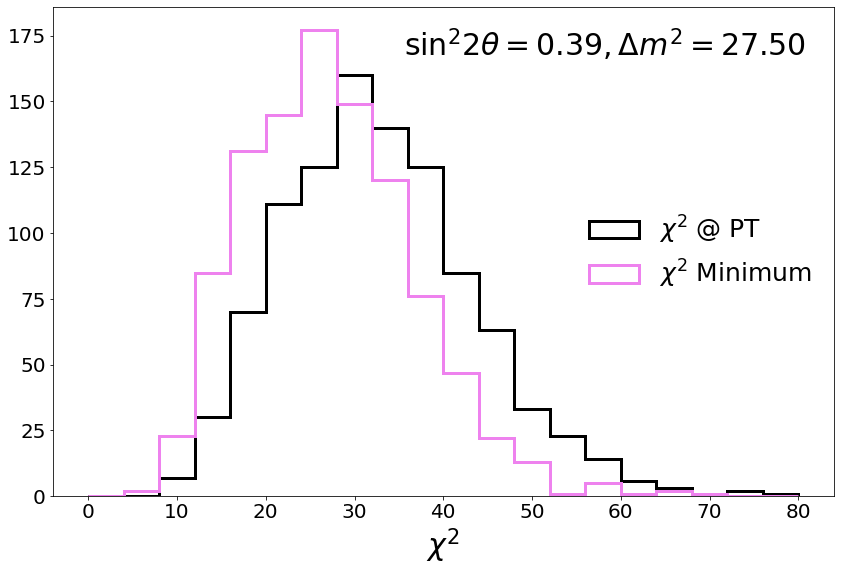

In [46]:
fig,ax = plt.subplots(figsize=(14,9))
_ = plt.hist(chisqpt_bf,histtype='step',range=(0,80),bins=20,facecolor=None,linewidth=3,edgecolor='black',label=r'$\chi^2$ @ PT')
_ = plt.hist(chisqbf_bf,histtype='step',range=(0,80),bins=20,facecolor=None,linewidth=3,edgecolor='violet',label=r'$\chi^2$ Minimum')
#_ = plt.hist(chisqpt_bf-chisqbf_bf,histtype='step',range=(0,40),bins=20,facecolor=None,linewidth=3,edgecolor='violet')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.set_xlabel(r'$\chi^2$',fontsize=30)
plt.annotate(r'$\sin^22\theta=%.2f, \Delta m^2=%.2f$'%(0.39,27.5),xy=(0.45, .9), xycoords='axes fraction',fontsize=30)
ax.legend(loc='center right',frameon=False,fontsize=25)

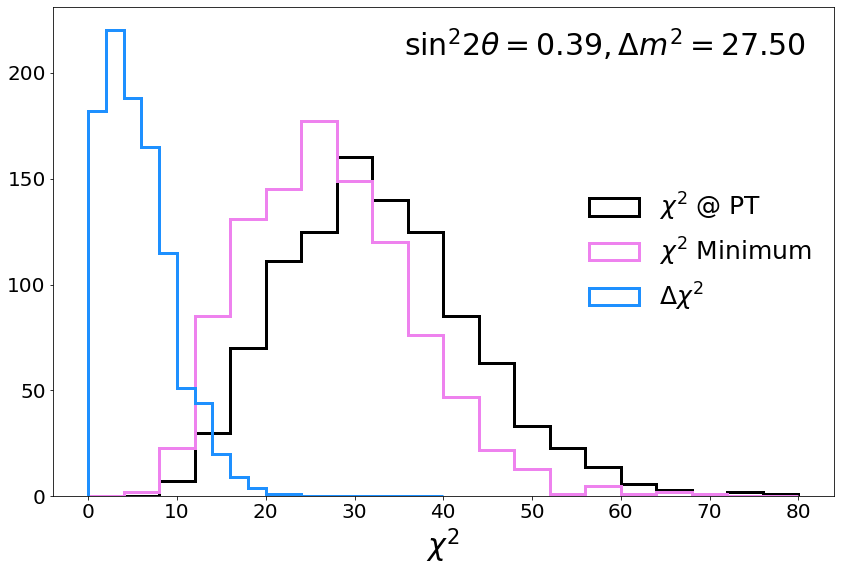

In [58]:
fig,ax = plt.subplots(figsize=(14,9))
_ = plt.hist(chisqpt_bf,histtype='step',range=(0,80),bins=20,facecolor=None,linewidth=3,edgecolor='black',label=r'$\chi^2$ @ PT')
_ = plt.hist(chisqbf_bf,histtype='step',range=(0,80),bins=20,facecolor=None,linewidth=3,edgecolor='violet',label=r'$\chi^2$ Minimum')
_ = plt.hist(chisqpt_bf-chisqbf_bf,histtype='step',range=(0,40),bins=20,facecolor=None,linewidth=3,edgecolor='dodgerblue',label=r'$\Delta \chi^2$')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.set_xlabel(r'$\chi^2$',fontsize=30)
plt.annotate(r'$\sin^22\theta=%.2f, \Delta m^2=%.2f$'%(0.39,27.5),xy=(0.45, .9), xycoords='axes fraction',fontsize=30)
ax.legend(loc='center right',frameon=False,fontsize=25)

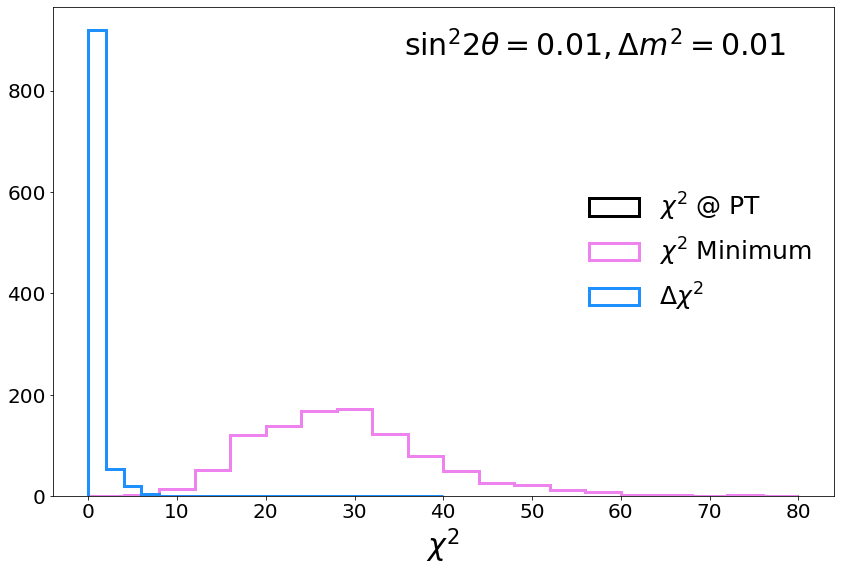

In [60]:
fig,ax = plt.subplots(figsize=(14,9))
_ = plt.hist(chisqbf_null,histtype='step',range=(0,80),bins=20,facecolor=None,linewidth=3,edgecolor='black',label=r'$\chi^2$ @ PT')
_ = plt.hist(chisqbf_null,histtype='step',range=(0,80),bins=20,facecolor=None,linewidth=3,edgecolor='violet',label=r'$\chi^2$ Minimum')
_ = plt.hist(chisqpt_null-chisqbf_null,histtype='step',range=(0,40),bins=20,facecolor=None,linewidth=3,edgecolor='dodgerblue',label=r'$\Delta \chi^2$')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.set_xlabel(r'$\chi^2$',fontsize=30)
plt.annotate(r'$\sin^22\theta=%.2f, \Delta m^2=%.2f$'%(0.01,0.01),xy=(0.45, .9), xycoords='axes fraction',fontsize=30)
ax.legend(loc='center right',frameon=False,fontsize=25)

dof: 1.424137654919014


Text(0.5, 1.0, '@ Null')

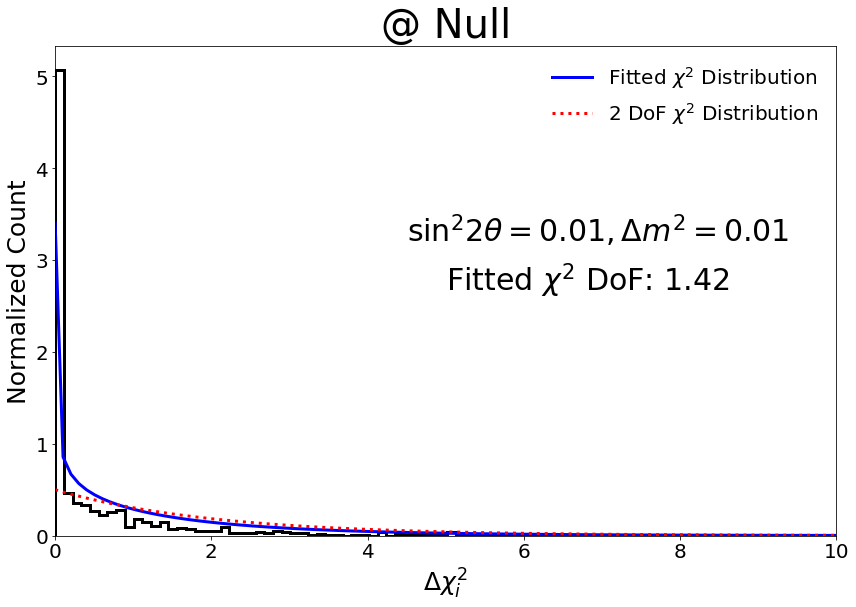

In [69]:
fig,ax = plt.subplots(figsize=(14,9))
_ = plt.hist(chisqpt_null-chisqbf_null,histtype='step',bins=80,facecolor=None,linewidth=3,edgecolor='black',density=1)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


ax.set_xlim(0,10)
#ax.set_ylim(0,1)
x = np.linspace(.001,10,100)

ax.set_xlabel(r'$\Delta\chi^2_i$',fontsize=25)
ax.set_ylabel('Normalized Count',fontsize=25)


df,loc,scale = scipy.stats.distributions.chi2.fit(chisqpt_null-chisqbf_null)
fitted_data = scipy.stats.distributions.chi2.pdf(x,df,loc,scale)

twodof_data = scipy.stats.distributions.chi2.pdf(x,2,0,1)

print('dof:',df)

plt.plot(x,fitted_data,'b-',label=r'Fitted $\chi^2$ Distribution',linewidth=3)
plt.plot(x,twodof_data,'r:',label=r'2 DoF $\chi^2$ Distribution',linewidth=3)

ax.legend(fontsize=20,frameon=False)

plt.annotate(r'$\sin^22\theta=%.2f, \Delta m^2=%.2f$'%(0.01,0.01),xy=(0.45, .6), xycoords='axes fraction',fontsize=30)
plt.annotate(r'Fitted $\chi^2$ DoF: %.2f'%(df),xy=(0.5, .5), xycoords='axes fraction',fontsize=30)

ax.set_title('@ Null',fontsize=40)

dof: 1.851941017916824


Text(0.5, 1.0, '@ Best Fit')

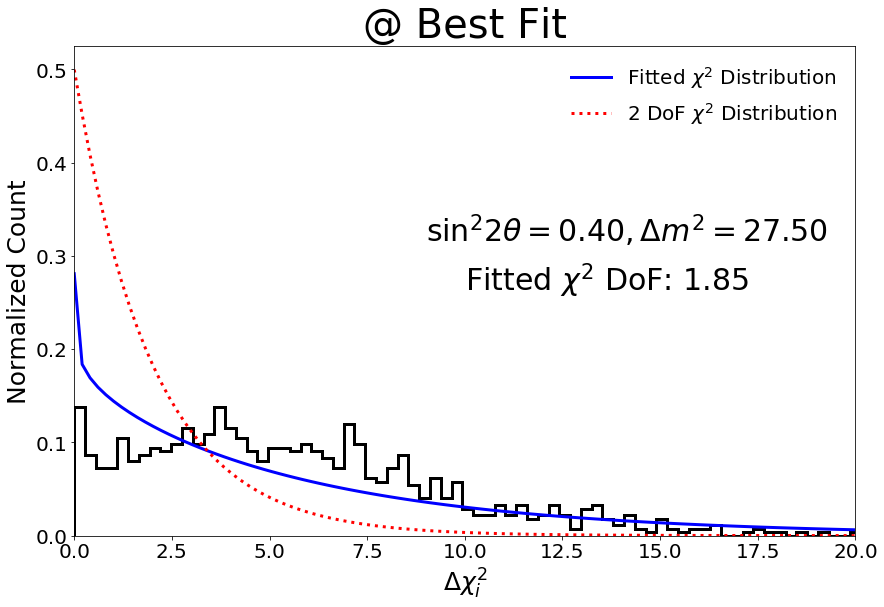

In [82]:
fig,ax = plt.subplots(figsize=(14,9))
_ = plt.hist(chisqpt_bf-chisqbf_bf,histtype='step',bins=80,facecolor=None,linewidth=3,edgecolor='black',density=1)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


ax.set_xlim(0,20)
#ax.set_ylim(0,1)
x = np.linspace(.001,20,100)

ax.set_xlabel(r'$\Delta\chi^2_i$',fontsize=25)
ax.set_ylabel('Normalized Count',fontsize=25)


df,loc,scale = scipy.stats.distributions.chi2.fit(chisqpt_bf-chisqbf_bf)
fitted_data = scipy.stats.distributions.chi2.pdf(x,df,loc,scale)

twodof_data = scipy.stats.distributions.chi2.pdf(x,2,0,1)

print('dof:',df)

plt.plot(x,fitted_data,'b-',label=r'Fitted $\chi^2$ Distribution',linewidth=3)
plt.plot(x,twodof_data,'r:',label=r'2 DoF $\chi^2$ Distribution',linewidth=3)

ax.legend(fontsize=20,frameon=False)

plt.annotate(r'$\sin^22\theta=%.2f, \Delta m^2=%.2f$'%(0.4,27.5),xy=(0.45, .6), xycoords='axes fraction',fontsize=30)
plt.annotate(r'Fitted $\chi^2$ DoF: %.2f'%(df),xy=(0.5, .5), xycoords='axes fraction',fontsize=30)

ax.set_title('@ Best Fit',fontsize=40)

dof: 1.86219488434568


Text(0.5, 0.5, 'Fitted $\\chi^2$ DoF: 1.86')

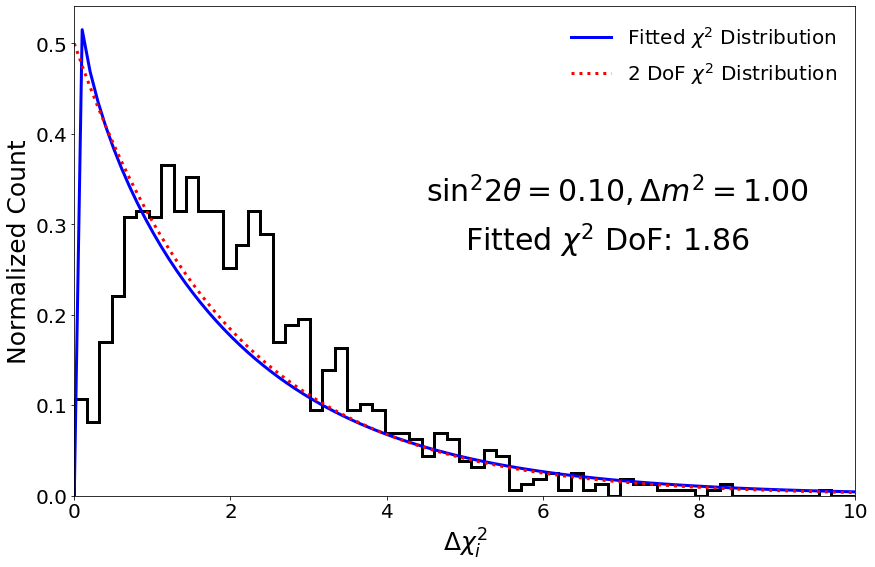

In [89]:
fig,ax = plt.subplots(figsize=(14,9))
_ = plt.hist(chisqpt_1ev-chisqbf_1ev,histtype='step',bins=80,facecolor=None,linewidth=3,edgecolor='black',density=1)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


ax.set_xlim(0,10)
#ax.set_ylim(0,1)
x = np.linspace(.001,10,100)

ax.set_xlabel(r'$\Delta\chi^2_i$',fontsize=25)
ax.set_ylabel('Normalized Count',fontsize=25)


df,loc,scale = scipy.stats.distributions.chi2.fit(chisqpt_1ev-chisqbf_1ev)
fitted_data = scipy.stats.distributions.chi2.pdf(x,df,loc,scale)

twodof_data = scipy.stats.distributions.chi2.pdf(x,2,0,1)

print('dof:',df)

plt.plot(x,fitted_data,'b-',label=r'Fitted $\chi^2$ Distribution',linewidth=3)
plt.plot(x,twodof_data,'r:',label=r'2 DoF $\chi^2$ Distribution',linewidth=3)

ax.legend(fontsize=20,frameon=False)

plt.annotate(r'$\sin^22\theta=%.2f, \Delta m^2=%.2f$'%(0.1,1.0),xy=(0.45, .6), xycoords='axes fraction',fontsize=30)
plt.annotate(r'Fitted $\chi^2$ DoF: %.2f'%(df),xy=(0.5, .5), xycoords='axes fraction',fontsize=30)

#ax.set_title('@ Best Fit',fontsize=40)